In [1]:
library(ggplot2)
library(mgcv)
library(visreg)
library(reshape2)
library(ggpubr)
library(ggpattern)
library(plyr)
library(ggsignif)
library(lmerTest)

datax=read.csv('gmdata2.csv')
datax = na.omit(datax)
datax = datax[datax$CBF.GM < 120 ,]
datax = datax[datax$CBF.GM > 5 ,]
datasets = datax

Loading required package: nlme

This is mgcv 1.8-36. For overview type 'help("mgcv-package")'.

Loading required namespace: memoise


Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘lme4’


The following object is masked from ‘package:nlme’:

    lmList



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”
Warning message:
“position_dodge requires non-overlapping x intervals”
Warning message:
“position_dodge requires non-overlapping x intervals”


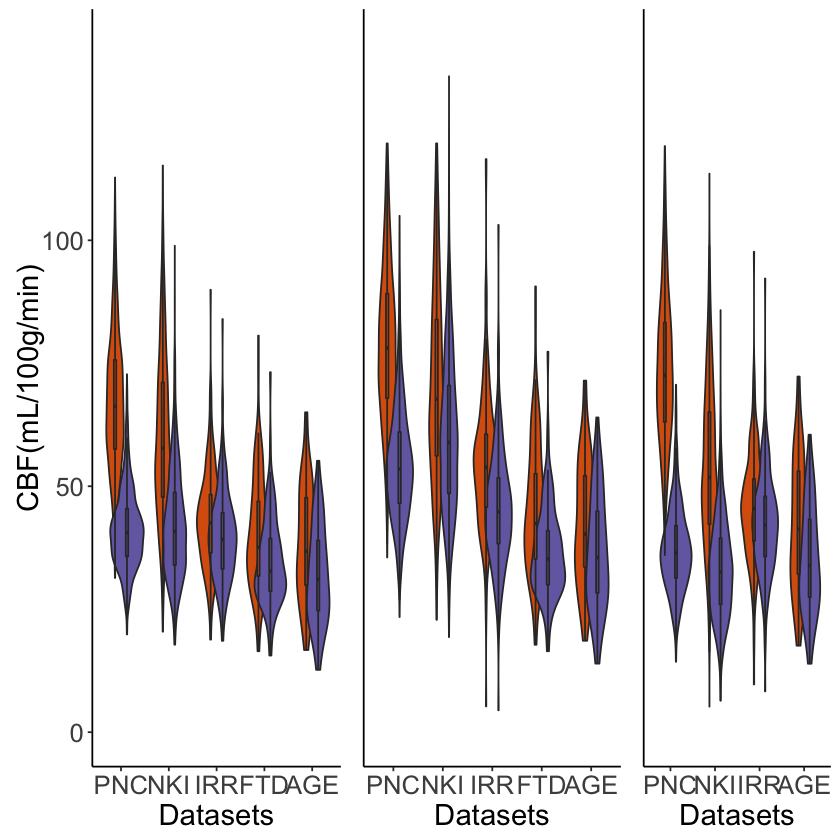

In [2]:
datagm = datax 
datagm$CBF.WM =NULL
datagm$TP ='GM'
datagm$CBF=datagm$CBF.GM 
datagm$CBF.GM = NULL 

datawm = datax 
datawm$CBF.GM =NULL
datawm$TP ='WM'
datawm$CBF=datawm$CBF.WM  
datawm$CBF.WM = NULL 

datasets = rbind(datagm,datawm)

datasetsy = datasets[datasets$CBFTYPE =='BASIL',]
datasetsy = na.omit(datasetsy)


dodge <- position_dodge(width = 0.5)
basil <- ggplot(datasetsy, aes(x=Datasets,y=CBF,fill=TP),plot = FALSE) + 
  geom_violin(position = dodge,width = 1.4)+
  geom_boxplot(width=.1, outlier.colour=NA, position = dodge) 
basil=basil + theme_classic() + scale_x_discrete(limits = rev) + 
  labs(x = "Datasets", y = "CBF(mL/100g/min)") +
  theme(axis.title.x = element_text(size = rel(1.6))) +
  theme(axis.title.y = element_text(size = rel(1.6),vjust=-0.2)) + ylim(0,140) +
  theme(axis.text = element_text(size = rel(1.4))) + theme(axis.line = element_line(colour = 'black', size = .5)) +
  scale_fill_manual(values=c("#d95f0e","#756bb1")) + theme(legend.position = "none")



datasetsy = datasets[datasets$CBFTYPE =='PVC',]
datasetsy = na.omit(datasetsy)

dodge <- position_dodge(width = 0.5)
pvc<- ggplot(datasetsy, aes(x=Datasets,y=CBF,fill=TP),plot = FALSE) + 
  geom_violin(position = dodge,width = 1.4)+
  geom_boxplot(width=.1, outlier.colour=NA, position = dodge) 
pvc=pvc + theme_classic() + scale_x_discrete(limits = rev) + 
  labs(x = "Datasets", y = "CBF(mL/100 g/min)") +
  theme(axis.title.x = element_text(size = rel(1.6))) +
  theme(axis.title.y = element_text(size = rel(1.6))) + ylim(0,140) +scale_fill_manual(values=c("#d95f0e","#756bb1"))+
  theme(axis.text = element_text(size = rel(1.4))) + theme(axis.line = element_line(colour = 'black', size = .5)) +
  theme(axis.title.y = element_blank(),axis.ticks.y = element_blank(),axis.text.y = element_blank()) +
theme(legend.position = "none")


datasetsy = datasets[datasets$CBFTYPE =='SCRUB',]
datasetsy = na.omit(datasetsy)

dodge <- position_dodge(width = 0.5)
scrub <- ggplot(datasetsy, aes(x=Datasets,y=CBF,fill=TP),plot = FALSE) + 
  geom_violin(position = dodge,width = 1.4)+
  geom_boxplot(width=.1, outlier.colour=NA, position = dodge) 
scrub=scrub + theme_classic() + scale_x_discrete(limits = rev) + 
  labs(x = "Datasets", y = "CBF(mL/100 g/min)") +
  theme(axis.title.x = element_text(size = rel(1.6))) + scale_fill_manual(values=c("#d95f0e","#756bb1"))+
  theme(axis.title.y = element_text(size = rel(1.6))) + ylim(0,140) +
  theme(axis.text = element_text(size = rel(1.4))) + theme(axis.line = element_line(colour = 'black', size = .5)) +
theme(axis.title.y = element_blank(),axis.ticks.y = element_blank(),axis.text.y = element_blank()) +
theme(legend.position = "none")
 



figure <- ggarrange(basil,pvc,scrub,
                    ncol = 3, nrow = 1,widths=c(2.5,2,1.5) )
ggsave("Sup_Figure4.pdf", width=10, units="in", height=3,dpi=800)
figure